# 4.1

In [1]:
import numpy.random
import numpy as np
import pandas as pd
import scipy.stats as st
from tqdm import tqdm
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

mpl.style.use('seaborn')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['figure.figsize'] = (9.0, 9.0)

In [2]:
data = pd.read_csv("data/corona.csv")
data.head()

,Страна,заболевшие,выздоровевшие
0,германия,2078,25
1,дания,617,1
2,малайзия,149,26
3,австрия,302,4
4,ирак,71,15


In [3]:
data.describe()

,заболевшие,выздоровевшие
count,26.000000,26.000000
mean,4782.884615,2611.884615
std,15866.452164,12311.274057
min,67.000000,1.000000
25%,119.750000,5.750000
50%,380.500000,20.000000
75%,1974.250000,80.750000
max,80932.000000,62901.000000


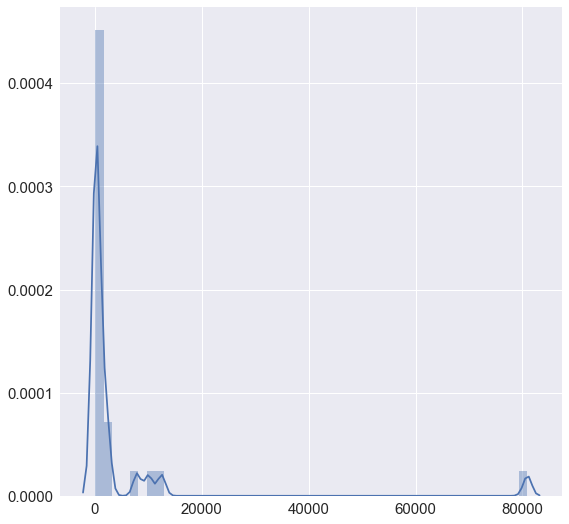

In [4]:
x = data['заболевшие'].values
y = data['выздоровевшие'].values
x1 = x[x<60000]
y1 = y[y<60000]
sns.distplot(x)

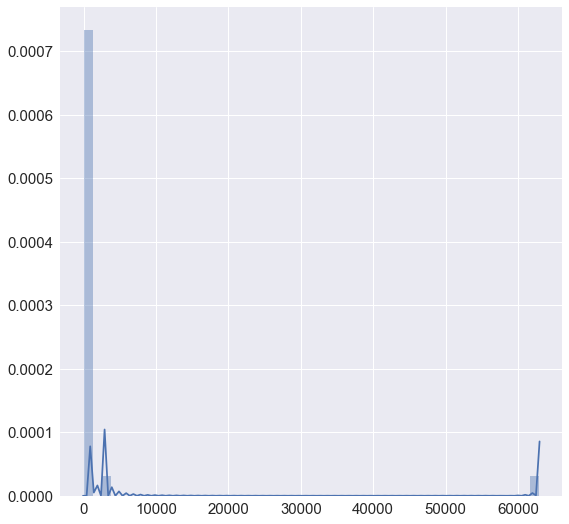

In [5]:
sns.distplot(y)

По распределениям ничего нельзя сказать

In [6]:
# с Китаем
st.kendalltau(x, y, method="auto")

KendalltauResult(correlation=0.28351110894619114, pvalue=0.044325607642096566)

In [7]:
# без Китая
st.kendalltau(x1, y1, method="auto")

KendalltauResult(correlation=0.22299333487183037, pvalue=0.12212105747986692)

In [17]:
res = []
for alpha in tqdm(np.linspace(0.01, 5.0, 100)):
    tau_temp = []
    rejected = 0
    for _ in range(1000):
        X1 = np.random.randn(26)
        X2 = -X1 + alpha*np.random.randn(26)
        tau, p_val = st.kendalltau(X1, X2, method="auto")
        tau_temp.append(tau)
        if p_val <= 0.05:
            rejected += 1
    res.append((np.mean(tau_temp), rejected/1000))

for alpha in tqdm(np.linspace(0.01, 5.0, 100)):
    tau_temp = []
    rejected = 0
    for _ in range(1000):
        X1 = np.random.randn(26)
        X2 = X1 + alpha*np.random.randn(26)
        tau, p_val = st.kendalltau(X1, X2, method="auto")
        tau_temp.append(tau)
        if p_val <= 0.05:
            rejected += 1
    res.append((np.mean(tau_temp), rejected/1000))

100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


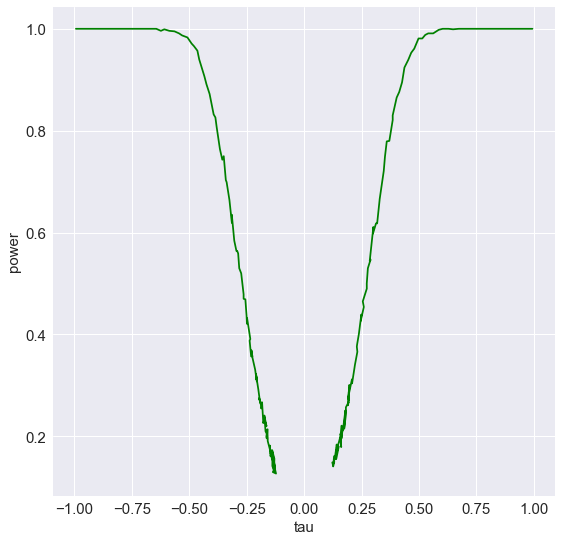

In [18]:
plt.plot([item[0] for item in res[:100]], [item[1] for item in res[:100]], color='green')
plt.plot([item[0] for item in res[100:]], [item[1] for item in res[100:]], color='green')
plt.xlabel("tau")
plt.ylabel("power")
plt.savefig('./4_1.png')
plt.show()